In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
data = pd.read_csv("dataset_ridge&lasso/Algerian_forest_fires_dataset_UPDATE.csv")


In [24]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [25]:
data.shape

(122, 14)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [27]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [28]:
data.shape

(122, 14)

In [29]:
data = data.drop(43)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4    RH          121 non-null    int64  
 5    Ws          121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    object 
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 14.2+ KB


In [31]:
data[['FWI','DC']] = data[['FWI','DC']].astype(float)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4    RH          121 non-null    int64  
 5    Ws          121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    float64
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    float64
 13  Classes      121 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 14.2+ KB


In [33]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [34]:
data.loc[:111,'Region'] = 0

In [35]:
data.loc[111:,'Region'] = 1

In [39]:
data.Region = data.Region.astype(int)

In [40]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [41]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
118,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
121,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [42]:
data.to_csv('EDA_Aglerian_data.csv',index= False)

### EDA

In [43]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [45]:
data = data.drop(['day','month','year'],axis= 1)

In [46]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [63]:
data_copy = data

In [65]:
data_copy.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [66]:
data_copy.columns = data_copy.columns.str.strip()

In [74]:
data_copy['Classes'] = np.where(data_copy['Classes'].str.contains('fire'),1,0)

AttributeError: Can only use .str accessor with string values!

In [75]:
data_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,1,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,1,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,1,0


In [76]:
data_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
117,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
118,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
119,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
120,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
121,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,1


In [80]:
data_copy['Classes'].value_counts()

Classes
1    121
Name: count, dtype: int64

In [82]:
data_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.594127,-0.270491,-0.127553,0.571143,0.394472,0.292707,0.535954,0.373088,0.500971,NaN,-0.317852
RH,-0.594127,1.000000,0.154297,0.146750,-0.644134,-0.384730,-0.275144,-0.691191,-0.367170,-0.605856,NaN,0.131332
Ws,-0.270491,0.154297,1.000000,-0.137527,-0.025478,0.031887,0.023962,0.128558,0.033553,0.106128,NaN,0.044886
Rain,-0.127553,0.146750,-0.137527,1.000000,-0.509872,-0.349583,-0.347646,-0.412636,-0.359493,-0.410213,NaN,-0.002110
FFMC,0.571143,-0.644134,-0.025478,-0.509872,1.000000,0.584221,0.486333,0.752513,0.580449,0.719593,NaN,-0.191016
DMC,0.394472,-0.384730,0.031887,-0.349583,0.584221,1.000000,0.882487,0.631017,0.987926,0.852193,NaN,-0.066676
DC,0.292707,-0.275144,0.023962,-0.347646,0.486333,0.882487,1.000000,0.474039,0.927774,0.716965,NaN,0.041024
ISI,0.535954,-0.691191,0.128558,-0.412636,0.752513,0.631017,0.474039,1.000000,0.612286,0.916427,NaN,-0.136801
BUI,0.373088,-0.367170,0.033553,-0.359493,0.580449,0.987926,0.927774,0.612286,1.000000,0.844715,NaN,-0.026998
FWI,0.500971,-0.605856,0.106128,-0.410213,0.719593,0.852193,0.716965,0.916427,0.844715,1.000000,NaN,-0.098780


C:\Users\Karan Sharma\AppData\Local\Temp\ipykernel_5536\1472601596.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


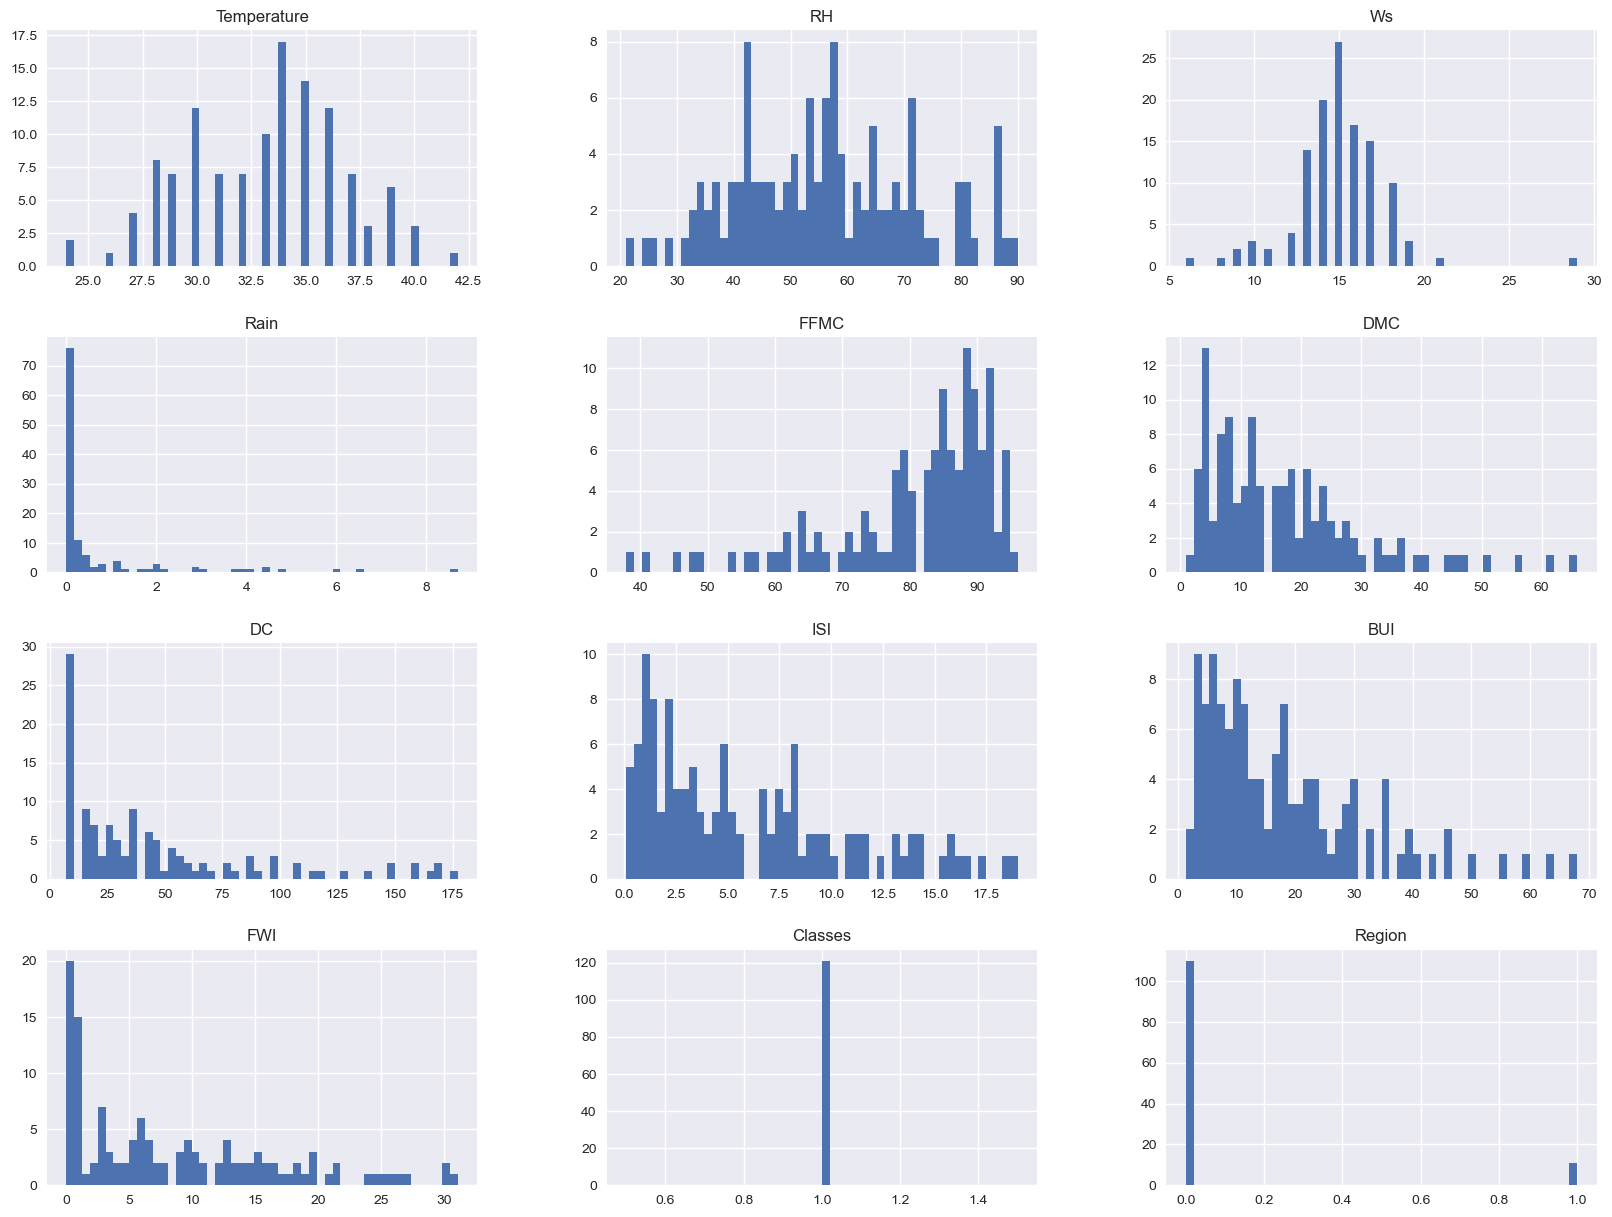

In [85]:
plt.style.use('seaborn')
data_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [99]:
def gambhir(dataset,threshold):
    col_cor = set()
    corr_matrix = data_copy.corr()
    for i in range(len(data_copy.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_cor.add(colname)
    return col_cor

In [100]:
gambhir(data_copy,0.7)

{'BUI', 'DC', 'FWI', 'ISI'}

In [94]:
data_copy.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,1,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,1,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1,0


In [95]:
data_copy.iloc[0,2]

12

In [102]:
data_copy.shape

(121, 12)